In [1]:
# 导入保存的特征矩阵和目标值
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
data_path = '../data/'

In [2]:
omega = np.load(data_path + 'omega_accumulated.npy')
current = np.load(data_path + 'current_accumulated.npy')

# 打印数据以确认导入是否成功
print("Loaded X_accumulated:")
print(omega)

print("\nLoaded P_accumulated:")
print(current)
print(omega.shape)
print(current.shape)

Loaded X_accumulated:
[-8.18816225e-37 -9.15615199e-38 -3.81174230e-38 ...  2.10912323e+02
  2.11575974e+02  2.12193085e+02]

Loaded P_accumulated:
[0.         0.         0.         ... 1.12477076 1.1075567  1.09027112]
(20144,)
(20144,)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.basis_function._basis_function import Polynomial
# from sysidentpy.models.linear_basis_function import PolynomialNarmax
from sysidentpy.utils.display_results import results

# 1. 生成数据
np.random.seed(42)
N = 100  # 样本数量

# 定义输入信号 u(k)
u = np.sin(np.linspace(0, 10, N))

# 模拟输出信号 y(k)
a1_true = -0.7  # 真正的 a1 系数
b1_true = 1.0   # 真正的 b1 系数

y = np.zeros(N)  # 初始化输出
for k in range(1, N):
    y[k] = -a1_true * y[k-1] + b1_true * u[k-1]  # 根据模型生成数据

# 2. 准备数据
y = y.reshape(-1, 1)  # 将输出转换为二维数组
u = u.reshape(-1, 1)  # 将输入转换为二维数组

# 3. 定义模型

# 4. 使用 FROLS 方法进行模型辨识
basis_function = Polynomial(degree=1)
estimator = LeastSquares()
model = FROLS(
    order_selection=True,
    n_info_values=3,
    ylag=1,
    xlag=1,
    info_criteria="aic",
    estimator=estimator,
    err_tol=None,
    basis_function=basis_function,
)
model.fit(X=u, y=y)

# 5. 显示辨识结果
print("辨识结果:")
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)
# print(results(frols, model))

# 6. 使用辨识的模型预测输出
# y_pred = model.predict(X_input=u)

# # 7. 绘制实际输出与预测输出对比
# plt.figure()
# plt.plot(y, label="实际输出 y(k)")
# plt.plot(y_pred, label="预测输出 y(k)", linestyle="--")
# plt.legend()
# plt.title("实际输出与预测输出对比")
# plt.xlabel("时间步 k")
# plt.ylabel("输出 y(k)")
# plt.grid(True)
# plt.show()


辨识结果:
  Regressors  Parameters             ERR
0     y(k-1)  7.0000E-01  9.89623196E-01
1    x1(k-1)  1.0000E+00  9.47938878E-01


Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.

$$
    y_k = \sum_{i=1}^{p}\Theta_i \times \prod_{j=0}^{n_x}u_{k-j}^{b_i, j}
    \prod_{l=1}^{n_e}e_{k-l}^{d_i, l}\prod_{m=1}^{n_y}y_{k-m}^{a_i, m}
$$

where $p$ is the number of regressors, $\Theta_i$ are the
model parameters, and $a_i, m, b_i, j$ and $d_i, l \in \mathbb{N}$
are the exponents of the output, input and noise terms, respectively.

Parameters
----------
degree : int (max_degree), default=2
    The maximum degree of the polynomial features.

Notes
-----
Be aware that the number of features in the output array scales
significantly as the number of inputs, the max lag of the input and output, and
degree increases. High degrees can cause overfitting.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.basis_function._basis_function import Polynomial
# from sysidentpy.models.linear_basis_function import PolynomialNarmax
from sysidentpy.utils.display_results import results

In [4]:
# 2. 准备数据
y = omega.reshape(-1, 1)  # 将输出转换为二维数组
u = current.reshape(-1, 1)  # 将输入转换为二维数组


In [30]:
basis_function = Polynomial(degree=2)
estimator = LeastSquares()
model = FROLS(
    order_selection=True,
    n_info_values=4,
    ylag=1,
    xlag=3,
    info_criteria="aic",
    estimator=estimator,
    err_tol=1,
    basis_function=basis_function,
)
model.fit(X=u, y=y)

# 5. 显示辨识结果
print("辨识结果:")
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

辨识结果:
  Regressors   Parameters             ERR
0     y(k-1)   9.9913E-01  9.99988133E-01
1    x1(k-3)   6.3079E-01  1.13952887E-05
2  x1(k-1)^2  -2.1965E-02  7.20742238E-08
3   y(k-1)^2   6.9059E-07  2.22188107E-08


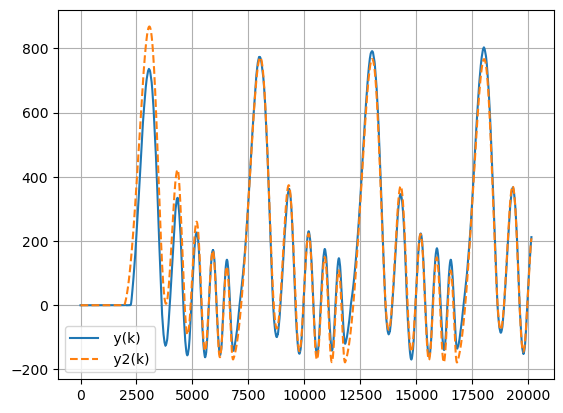

In [31]:
# 6. 使用辨识的模型预测输出
y_pred = model.predict(X=u, y=y)

# 7. 绘制实际输出与预测输出对比
plt.figure()

plt.plot(y, label=" y(k)")
plt.plot(y_pred, label=" y2(k)", linestyle="--")
plt.legend()
# plt.title("实际输出与预测输出对比")
plt.grid(True)
plt.show()

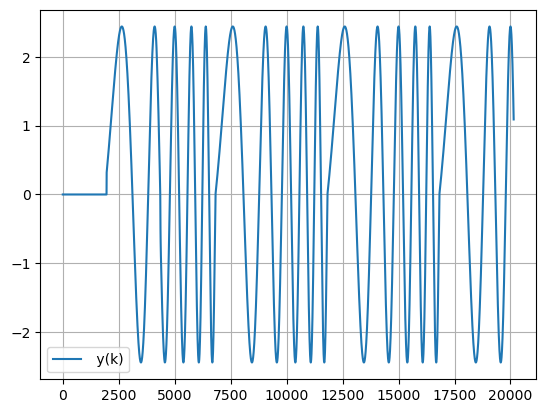

In [12]:
# 7. 绘制实际输出与预测输出对比
plt.figure()

plt.plot(u, label=" y(k)")
plt.legend()
# plt.title("实际输出与预测输出对比")
plt.grid(True)
plt.show()